<b> This is the Completed Python Notebook for Classification on Brain Tumor Metrics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations
import shap

In [7]:
# read in the csv
cols = ["Image", "Class", "Mean", "Variance", "Standard Deviation", "Entropy", "Skewness", "Kurtosis", "Contrast", "Energy", "ASM", "Homogeneity", "Dissimilarity", "Correlation", "Coarseness"]
df = pd.read_csv("../data/Brain_Tumor.csv")
df.columns = cols

<b> Here is the raw data file

In [8]:
df.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


<b> There seems to be only 1 "categorical" data but it is already numeric so no conversion needs to be done

In [9]:
# how many class types are there
df['Class'].unique()

array([0, 1])

In [10]:
df = df.drop(['Image', 'Variance', 'ASM'],axis=1)
df.head()

,Class,Mean,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.501140,6.834689,0.972789,7.458341e-155


<b> Before I initially researched each individual feature, I wanted to see if there is a linear correlation with each feature and the classification.
    <br> Therefore these plots are each feature plotted against the classification.

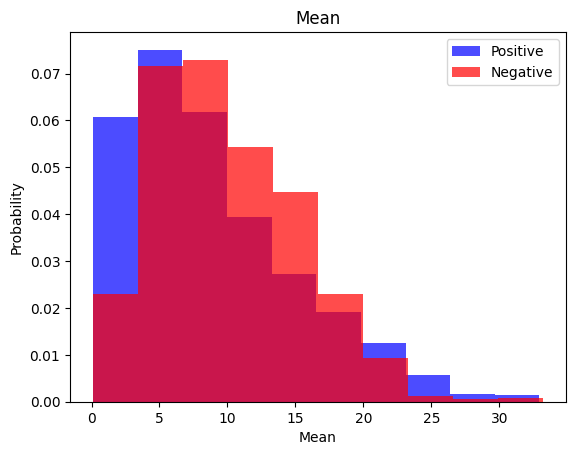

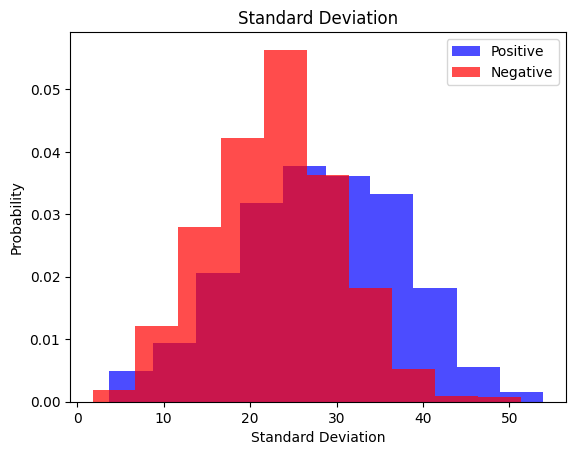

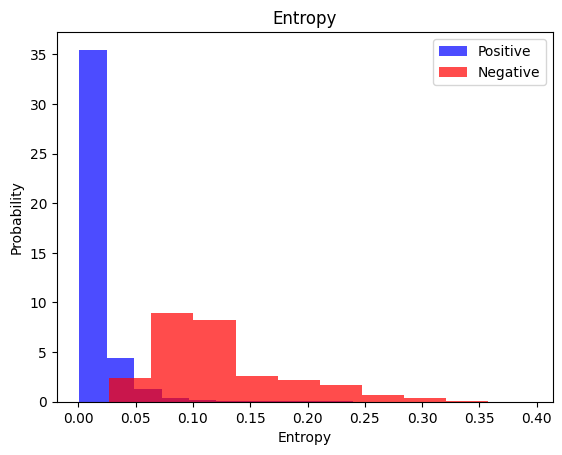

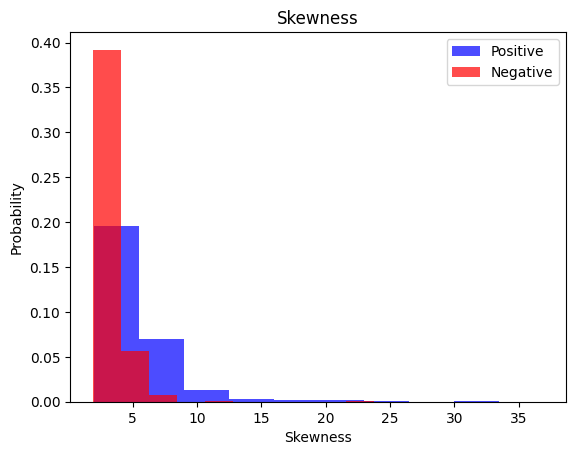

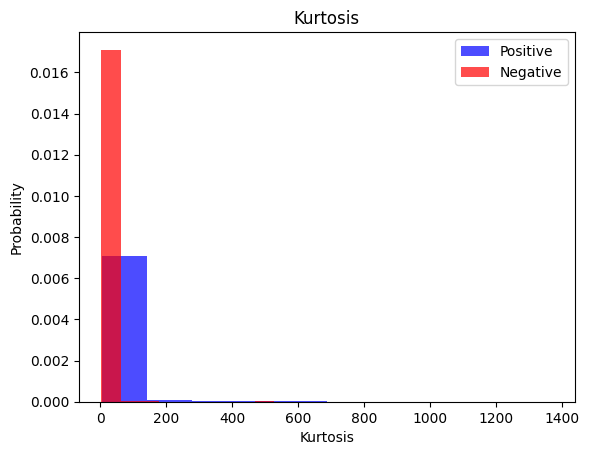

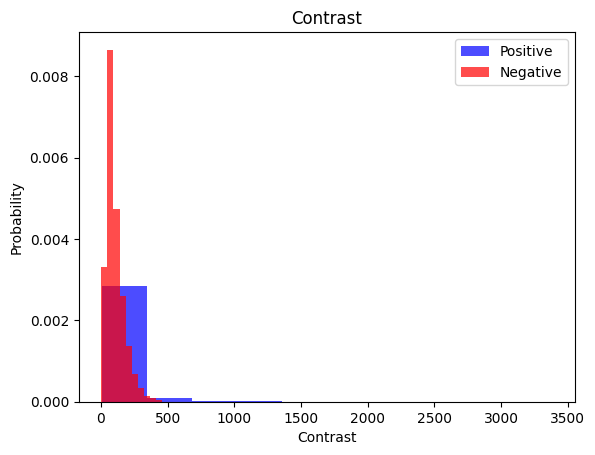

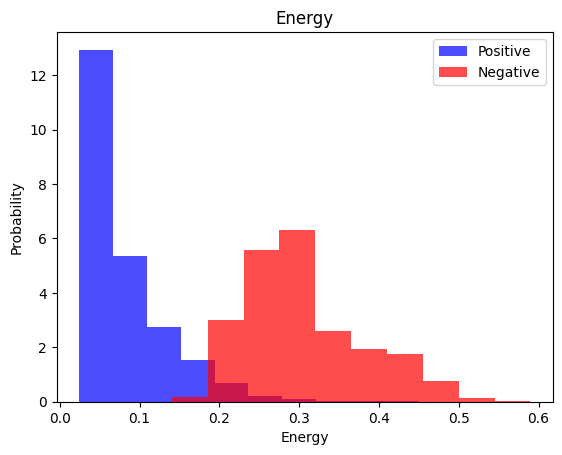

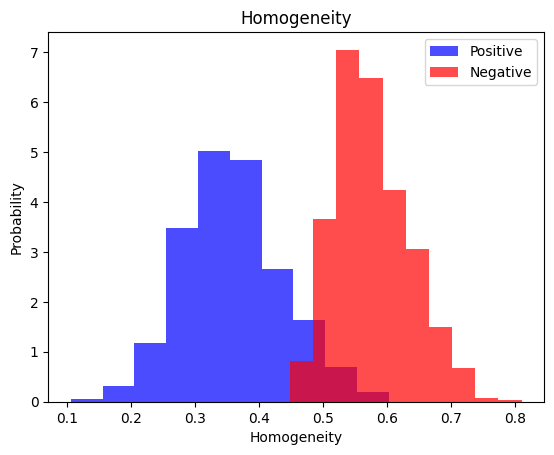

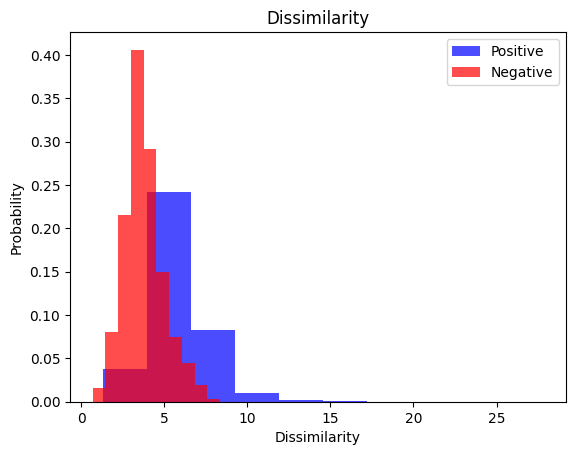

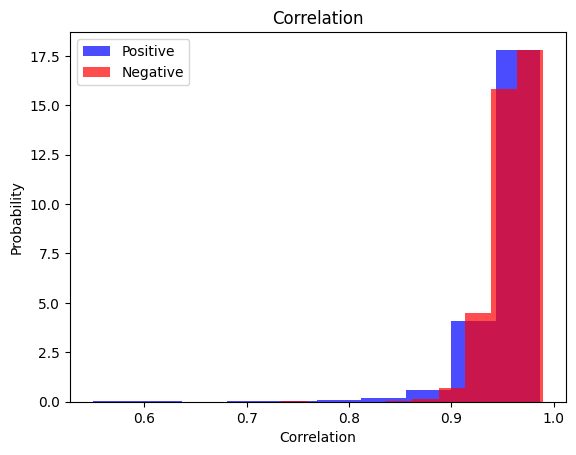

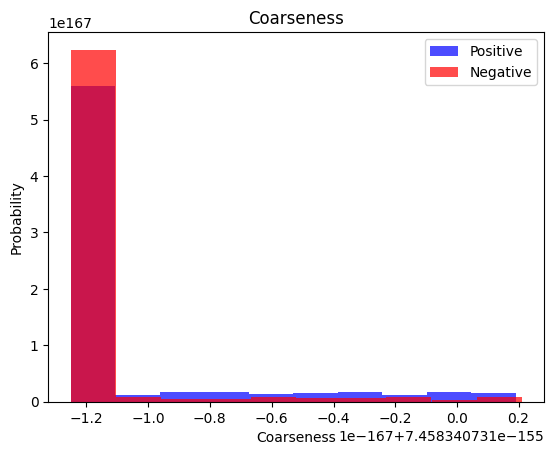

In [11]:
for label in df.columns[1:]:
    plt.hist(df[df["Class"]==1][label], color='blue', label='Positive', alpha=0.7, density=True)
    plt.hist(df[df["Class"]==0][label], color='red', label='Negative', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

<b> So in the raw dataset, it was observed that there may not have been an equal amount of brain tumor classed MRI scans versus negative reports.
  <br>  To compensate for this, we will apply a resampling technique of scaling using Random Over Sampling.

In [12]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[1:]].values
    y = dataframe[dataframe.columns[0]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X, y)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

<b> Below are the Machine Learning models used for my testing. <br>
    You can see that there were attempts using kNNs, Naive Bayes, Logistic Regession, and Support Vector Machines

In [13]:
def KNNFunc(X_train, y_train, X_test, y_test, trial_count):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    print(f"***Trial {trial_count}***")
    print(f"kNN Results:")
    print(classification_report(y_test, y_pred))
    return

In [14]:
def NaiveBayesFunc(X_train, y_train, X_test, y_test, trial_count):
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    print(f"***Trial {trial_count}***")
    print(f"Naive Bayes Results:")
    print(classification_report(y_test, y_pred))
    return 

In [15]:
def LogisticRegressionFunc(X_train, y_train, X_test, y_test, trial_count):
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    print(f"***Trial {trial_count}***")
    print(f"Logistic Regression Results:")
    print(classification_report(y_test, y_pred))
    return 

In [16]:
def SVMFunc(X_train, y_train, X_test, y_test, trial_count):
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"***Trial {trial_count}***")
    print(f"Support Vector Machine Results:")
    print(classification_report(y_test, y_pred))
    return 

<b> According to medical studies, there were 5 total features in batches of 2 that were noisy and uncertain. <br>
So using combinatorics, we test the 5 slected features in iterative stages to represent the outcomes as their respective power sets. <br>

In [17]:
noisy_features_batch_1 = ['Entropy', 'Kurtosis', 'Energy']
noisy_features_batch_2 = ['Contrast', 'Dissimilarity']

power_set_1 = [list(c) for i in range(4) for c in combinations(noisy_features_batch_1, i)]
power_set_2 = [list(c) for i in range(3) for c in combinations(noisy_features_batch_2, i)]

noisy_feature_combinations = [c1 + c2 for c1 in power_set_1 for c2 in power_set_2]

In [18]:
trial = 1
kept_features = ["Class", "Mean", "Standard Deviation", "Skewness", "Homogeneity", "Correlation", "Coarseness"]
for combo in noisy_feature_combinations:
    feature_set = kept_features + combo
    df_subset = df[feature_set]

    # Shuffle and split into 60/20/20
    train, valid, test = np.split(df_subset.sample(frac=1), [int(0.6*len(df_subset)), int(0.8*len(df_subset))])

    # Scale + oversample only on train
    _, X_train, y_train = scale_dataset(train, oversample=True)

    # Scale without oversample on valid/test
    _, X_valid, y_valid = scale_dataset(valid, oversample=False)
    _, X_test, y_test = scale_dataset(test, oversample=False)

    # Run all 4 models
    LogisticRegressionFunc(X_train, y_train, X_valid, y_valid, trial)
    KNNFunc(X_train, y_train, X_valid, y_valid, trial)
    NaiveBayesFunc(X_train, y_train, X_valid, y_valid, trial)
    SVMFunc(X_train, y_train, X_valid, y_valid, trial)

    trial += 1

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 1***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       399
           1       0.98      0.93      0.96       353

    accuracy                           0.96       752
   macro avg       0.96      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752

***Trial 1***
kNN Results:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       399
           1       0.97      0.92      0.94       353

    accuracy                           0.95       752
   macro avg       0.95      0.95      0.95       752
weighted avg       0.95      0.95      0.95       752

***Trial 1***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       399
           1       0.95      0.89      0.92       353

    accuracy                           0.93       752
   macro avg       0.93

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 6***
kNN Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       421
           1       0.99      0.96      0.98       331

    accuracy                           0.98       752
   macro avg       0.98      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

***Trial 6***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       421
           1       0.98      0.93      0.95       331

    accuracy                           0.96       752
   macro avg       0.96      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752

***Trial 6***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       421
           1       0.98      0.97      0.97       331

    accuracy                           0.98       752
   macro avg       0

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 9***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       402
           1       0.98      0.93      0.95       350

    accuracy                           0.96       752
   macro avg       0.96      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752

***Trial 9***
kNN Results:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       402
           1       0.98      0.93      0.96       350

    accuracy                           0.96       752
   macro avg       0.97      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752

***Trial 9***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       402
           1       0.99      0.86      0.92       350

    accuracy                           0.93       752
   macro avg       0.94

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 10***
kNN Results:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       439
           1       0.95      0.94      0.95       313

    accuracy                           0.95       752
   macro avg       0.95      0.95      0.95       752
weighted avg       0.95      0.95      0.95       752

***Trial 10***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       439
           1       0.96      0.88      0.92       313

    accuracy                           0.93       752
   macro avg       0.94      0.93      0.93       752
weighted avg       0.93      0.93      0.93       752

***Trial 10***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       439
           1       0.94      0.96      0.95       313

    accuracy                           0.96       752
   macro avg     

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 14***
kNN Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       440
           1       0.97      0.97      0.97       312

    accuracy                           0.97       752
   macro avg       0.97      0.97      0.97       752
weighted avg       0.97      0.97      0.97       752

***Trial 14***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       440
           1       0.97      0.95      0.96       312

    accuracy                           0.97       752
   macro avg       0.97      0.96      0.97       752
weighted avg       0.97      0.97      0.97       752

***Trial 14***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       440
           1       0.98      0.98      0.98       312

    accuracy                           0.98       752
   macro avg     

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Plea

***Trial 17***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       394
           1       0.99      0.96      0.98       358

    accuracy                           0.98       752
   macro avg       0.98      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

***Trial 18***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       424
           1       0.98      0.98      0.98       328

    accuracy                           0.98       752
   macro avg       0.98      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

***Trial 18***
kNN Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       424
           1       0.99      0.98      0.98       328

    accuracy                           0.99       752
   macro 

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 20***
kNN Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       416
           1       0.98      0.96      0.97       336

    accuracy                           0.98       752
   macro avg       0.98      0.97      0.98       752
weighted avg       0.98      0.98      0.98       752

***Trial 20***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       416
           1       0.99      0.89      0.93       336

    accuracy                           0.94       752
   macro avg       0.95      0.94      0.94       752
weighted avg       0.95      0.94      0.94       752

***Trial 20***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       416
           1       0.99      0.98      0.98       336

    accuracy                           0.99       752
   macro avg     

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 23***
kNN Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       428
           1       0.99      0.98      0.98       324

    accuracy                           0.99       752
   macro avg       0.99      0.99      0.99       752
weighted avg       0.99      0.99      0.99       752

***Trial 23***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       428
           1       0.98      0.95      0.97       324

    accuracy                           0.97       752
   macro avg       0.97      0.97      0.97       752
weighted avg       0.97      0.97      0.97       752

***Trial 23***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       428
           1       0.99      0.99      0.99       324

    accuracy                           0.99       752
   macro avg     

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


              precision    recall  f1-score   support

           0       0.91      0.99      0.95       413
           1       0.99      0.88      0.93       339

    accuracy                           0.94       752
   macro avg       0.95      0.94      0.94       752
weighted avg       0.95      0.94      0.94       752

***Trial 25***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       413
           1       0.99      0.95      0.97       339

    accuracy                           0.97       752
   macro avg       0.98      0.97      0.97       752
weighted avg       0.98      0.97      0.97       752

***Trial 26***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       416
           1       0.98      0.98      0.98       336

    accuracy                           0.98       752
   macro avg       0.98      0.98    

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 27***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       427
           1       0.96      0.98      0.97       325

    accuracy                           0.98       752
   macro avg       0.98      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

***Trial 28***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       435
           1       1.00      0.99      0.99       317

    accuracy                           0.99       752
   macro avg       0.99      0.99      0.99       752
weighted avg       0.99      0.99      0.99       752

***Trial 28***
kNN Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       435
           1       1.00      0.98      0.99       317

    accuracy                           0.99       752
   macro 

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


***Trial 30***
Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       413
           1       0.98      0.98      0.98       339

    accuracy                           0.98       752
   macro avg       0.98      0.98      0.98       752
weighted avg       0.98      0.98      0.98       752

***Trial 31***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       414
           1       0.99      0.97      0.98       338

    accuracy                           0.99       752
   macro avg       0.99      0.98      0.99       752
weighted avg       0.99      0.99      0.99       752

***Trial 31***
kNN Results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       414
           1       0.99      0.96      0.98       338

    accuracy                           0.98       752
   macro 

<b> Above are the results of the total power set with the noisy features <br><br>
On the next cell is the code for looking at the r-squared correlation values for all remaining features. <br>
This is done to check what features can be removed for redundancy and feature simplication.

In [19]:
# Class balance
print(df['Class'].value_counts(normalize=True))

# Correlation with Class label
print(df.corr()['Class'].sort_values(ascending=False))

# Check if any feature is constant
print((df.drop(columns='Class').nunique() == 1).sum(), "features are constant")


Class
0    0.552632
1    0.447368
Name: proportion, dtype: float64
Class                 1.000000
Dissimilarity         0.556319
Skewness              0.402644
Standard Deviation    0.285568
Kurtosis              0.239844
Contrast              0.212643
Mean                 -0.095729
Correlation          -0.108601
Entropy              -0.778180
Homogeneity          -0.847529
Energy               -0.862413
Coarseness                 NaN
Name: Class, dtype: float64
0 features are constant


In [20]:
df.head()

,Class,Mean,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.530941,4.473346,0.981939,7.458341e-155
1,0,8.749969,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.651352,3.220072,0.988834,7.458341e-155
2,1,7.341095,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.501140,6.834689,0.972789,7.458341e-155


In [21]:
exp_df_1 = df.drop(['Entropy', 'Kurtosis', 'Contrast', 'Energy', 'Dissimilarity'],axis=1)
exp_df_1.head()

,Class,Mean,Standard Deviation,Skewness,Homogeneity,Correlation,Coarseness
0,0,6.535339,24.891522,4.276477,0.530941,0.981939,7.458341e-155
1,0,8.749969,28.389393,3.718116,0.651352,0.988834,7.458341e-155
2,1,7.341095,33.820234,5.061750,0.268275,0.978014,7.458341e-155
3,1,5.958145,30.979219,5.677977,0.243851,0.964189,7.458341e-155
4,0,7.315231,27.010009,4.283221,0.501140,0.972789,7.458341e-155


<b> Attempt 1 at feature simplication was to remove the noisy features that we tested in the power set iteration.

In [22]:
exp_1_train, exp_1_valid, exp_1_test = np.split(exp_df_1.sample(frac=1), [int(0.6*len(exp_df_1)), int(0.8*len(exp_df_1))])

# Scale + oversample only on train
_, X_exp_1_train, y_exp_1_train = scale_dataset(exp_1_train, oversample=True)

# Scale without oversample on valid/test
_, X_exp_1_valid, y_exp_1_valid = scale_dataset(exp_1_valid, oversample=False)
_, X_exp_1_test, y_exp_1_test = scale_dataset(exp_1_test, oversample=False)


LogisticRegressionFunc(X_exp_1_train, y_exp_1_train, X_exp_1_valid, y_exp_1_valid, 33)
KNNFunc(X_exp_1_train, y_exp_1_train, X_exp_1_valid, y_exp_1_valid, 33)
NaiveBayesFunc(X_exp_1_train, y_exp_1_train, X_exp_1_valid, y_exp_1_valid, 33)
SVMFunc(X_exp_1_train, y_exp_1_train, X_exp_1_valid, y_exp_1_valid, 33)

***Trial 33***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       414
           1       0.97      0.94      0.95       338

    accuracy                           0.96       752
   macro avg       0.96      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752

***Trial 33***
kNN Results:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       414
           1       0.97      0.92      0.95       338

    accuracy                           0.95       752
   macro avg       0.96      0.95      0.95       752
weighted avg       0.95      0.95      0.95       752

***Trial 33***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       414
           1       0.99      0.91      0.94       338

    accuracy                           0.95       752
   macro avg       0

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


<b> Based on the above results, we repeat the same steps as above till we notice a noteable drop in performance based on the above metrics.

In [23]:
# Class balance
print(exp_df_1['Class'].value_counts(normalize=True))

# Correlation with Class label
print(exp_df_1.corr()['Class'].sort_values(ascending=False))

# Check if any feature is constant
print((exp_df_1.drop(columns='Class').nunique() == 1).sum(), "features are constant")

Class
0    0.552632
1    0.447368
Name: proportion, dtype: float64
Class                 1.000000
Skewness              0.402644
Standard Deviation    0.285568
Mean                 -0.095729
Correlation          -0.108601
Homogeneity          -0.847529
Coarseness                 NaN
Name: Class, dtype: float64
0 features are constant


In [24]:
exp_df_2 = exp_df_1.drop(['Skewness', 'Standard Deviation'], axis=1)
exp_df_2.head()

,Class,Mean,Homogeneity,Correlation,Coarseness
0,0,6.535339,0.530941,0.981939,7.458341e-155
1,0,8.749969,0.651352,0.988834,7.458341e-155
2,1,7.341095,0.268275,0.978014,7.458341e-155
3,1,5.958145,0.243851,0.964189,7.458341e-155
4,0,7.315231,0.501140,0.972789,7.458341e-155


In [25]:
exp_2_train, exp_2_valid, exp_2_test = np.split(exp_df_2.sample(frac=1), [int(0.6*len(exp_df_2)), int(0.8*len(exp_df_2))])

# Scale + oversample only on train
_, X_exp_2_train, y_exp_2_train = scale_dataset(exp_2_train, oversample=True)

# Scale without oversample on valid/test
_, X_exp_2_valid, y_exp_2_valid = scale_dataset(exp_2_valid, oversample=False)
_, X_exp_2_test, y_exp_2_test = scale_dataset(exp_2_test, oversample=False)

LogisticRegressionFunc(X_exp_2_train, y_exp_2_train, X_exp_2_valid, y_exp_2_valid, 34)
KNNFunc(X_exp_2_train, y_exp_2_train, X_exp_2_valid, y_exp_2_valid, 34)
NaiveBayesFunc(X_exp_2_train, y_exp_2_train, X_exp_2_valid, y_exp_2_valid, 34)
SVMFunc(X_exp_2_train, y_exp_2_train, X_exp_2_valid, y_exp_2_valid, 34)


***Trial 34***

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       418
           1       0.97      0.93      0.95       334

    accuracy                           0.95       752
   macro avg       0.96      0.95      0.95       752
weighted avg       0.96      0.95      0.95       752

***Trial 34***
kNN Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       418
           1       0.96      0.93      0.94       334

    accuracy                           0.95       752
   macro avg       0.95      0.95      0.95       752
weighted avg       0.95      0.95      0.95       752

***Trial 34***
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       418
           1       0.96      0.90      0.93       334

    accuracy                           0.94       752
   macro avg       0.94      0.93 

In [26]:
# Class balance
print(exp_df_2['Class'].value_counts(normalize=True))

# Correlation with Class label
print(exp_df_2.corr()['Class'].sort_values(ascending=False))

# Check if any feature is constant
print((exp_df_2.drop(columns='Class').nunique() == 1).sum(), "features are constant")

Class
0    0.552632
1    0.447368
Name: proportion, dtype: float64
Class          1.000000
Mean          -0.095729
Correlation   -0.108601
Homogeneity   -0.847529
Coarseness          NaN
Name: Class, dtype: float64
0 features are constant


In [27]:
final_df = exp_df_2
final_df.head()

,Class,Mean,Homogeneity,Correlation,Coarseness
0,0,6.535339,0.530941,0.981939,7.458341e-155
1,0,8.749969,0.651352,0.988834,7.458341e-155
2,1,7.341095,0.268275,0.978014,7.458341e-155
3,1,5.958145,0.243851,0.964189,7.458341e-155
4,0,7.315231,0.501140,0.972789,7.458341e-155


In [28]:
final_train, final_valid, final_test = np.split(final_df.sample(frac=1), [int(0.6*len(final_df)), int(0.8*len(final_df))])

_, X_final_train, y_final_train = scale_dataset(final_train, oversample=True)
_, X_final_valid, y_final_valid = scale_dataset(final_valid, oversample=False)
_, X_final_test, y_final_test = scale_dataset(final_test, oversample=False)
lr_final_model = LogisticRegression()
lr_final_model = lr_final_model.fit(X_final_train, y_final_train)

C:\Users\aneyk\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [29]:
LogisticRegressionFunc(X_final_train, y_final_train, X_final_valid, y_final_valid, 34)

***Trial 34***
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       422
           1       0.97      0.94      0.95       330

    accuracy                           0.96       752
   macro avg       0.96      0.96      0.96       752
weighted avg       0.96      0.96      0.96       752



In [30]:
final_features = ['Mean', 'Homogeneity', 'Correlation', 'Coarseness']
explainer = shap.Explainer(lr_final_model, X_final_train, feature_names = final_features)
shap_values = explainer(X_final_test)

<b> With my results from the above cell, the Logistic Regression Model performs the best using only 4 features for the 1 target feature. <br>
The results show that the model achieved an accuracy of 95%, with f-scores of 94% and 95% across both classes.

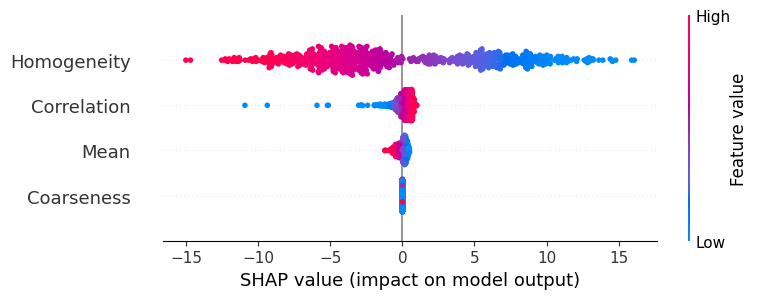

In [31]:
shap.summary_plot(shap_values, X_final_test, feature_names=final_features)

<b> The cell above shows the SHAP visual of the reamining features and their influence.